### testtttP50
#   [Config testCompleteC45W1P50]




python kernel 3.12.0

In [1]:
#   !pip install numpy

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import os
import csv



In [3]:
#   #   #   width = 1
#   #   #   center = 45
#   #   #   maximum_num_iterations = 10
#   #   #   iterations = list(range(0, maximum_num_iterations, 1) )
#   #   #   
#   #   #   # TN is constat at 30 minutes.
#   #   #   target_tn = 30
#   #   #   
#   #   #   #   probability_limes = 50
#   #   #   probability_limes = 50
#   #   #   #   target_tso = ["35", "40"]
#   #   #   #   target_tso : TSO varies around and above 30 minutes ; 
#   #   #   #   degeneracy is expected at 45
#   #   #   target_tso = ["25","30","35", "40", "44", "45", "46", "50"]
#   #   #   
#   #   #   print(iterations)
#   #   #   
#   #   #   
#   #   #   #   testCompleteC45W1P50-35.anf
#   #   #   anf_file_name_anf = f'testCompleteC{center}W{width}P{probability_limes}-{target_tso[0]}.anf'
#   #   #   print("anf: ", anf_file_name_anf)
#   #   #   
#   #   #   #   tC45W1P50-complete350.csv
#   #   #   #   tC45W1P50-complete351.csv
#   #   #   file_name_csv = f'tC{center}W{width}P{probability_limes}-complete{target_tso[0]}{0}.csv'
#   #   #   print(file_name_csv)

In [4]:
# ['testCompleteC45W1P50-0-20240109-11:11:16-14684', 'vector', 'J_Network.queuer', 'jobsQueueLen:vector', '', '', '', '', '', '', '', '', '', '........' , '0 1 .......'

# FILE : testExpP50_25_all.csv
# ROW : [ 'testExpP50-1-20240110-18:12:49-3640',  'vector', 'J_Network.queuer', 'jobsQueueLen:vector', '', '', '', '', '', '', '', '', '', '...tempi...' , '0 1 .......' ]



use_exp = True
distribution = "Exp"
probability = 50
num_iterations = 30
target_tso = ["25","30","35", "40", "45", "50"]
#   target_tso = ["25"]
    
r1 = "vector"
r2 = "J_Network.queuer"
r3 = "jobsQueueLen:vector"

jqLen_all_tsos = []
for tso_this_iter in range(0, len(target_tso), 1) :
    #   print(tso_this_iter)
    jQlen_all_this_tso = []
    file_name_csv = f'test{distribution}P{probability}_{target_tso[tso_this_iter]}_all.csv'

    with open(f'../simulations/results/{file_name_csv}') as csv_file : 
        reader = csv.reader(csv_file)
        for row in reader:
            if row[1]==r1 and row[2] == r2 and row[3]==r3:
                rigaTarget = list(row)
                tempi = rigaTarget[-2].split(" ")
                numeri = rigaTarget[-1].split(" ")
                for cont in range(0, len(tempi)):
                    jQlen_all_this_tso.append( ( int(numeri[cont]) , float(tempi[cont]) ) )

    jqLen_all_tsos.append(jQlen_all_this_tso)
    print(f'{file_name_csv} _ len : {len(jqLen_all_tsos[tso_this_iter])}' )

# now we have all tsos of all !


testExpP50_25_all.csv _ len : 169029
testExpP50_30_all.csv _ len : 168772
testExpP50_35_all.csv _ len : 169652
testExpP50_40_all.csv _ len : 169210
testExpP50_45_all.csv _ len : 167805
testExpP50_50_all.csv _ len : 161282


In [5]:

#   #   for i in jQueueLen_vector:
#   #       nums.append( int(i[0]))
#   #   print(nums)

nums_all_tsos = []
for tso_this_iter in range(0, len(target_tso), 1) :
    nums = []
    for i in range(0, len(jqLen_all_tsos[tso_this_iter]) ):
        #   print(jqLen_all_tsos[tso_this_iter][i])
        #   #   (1, 88636.481)
        #   #   (0, 88636.481)
        #   #   (1, 90321.392)
        nums.append( int(jqLen_all_tsos[tso_this_iter][i][0]))
    nums_all_tsos.append(nums)
    print(f'testExp_{target_tso[tso_this_iter]} len : {len(nums_all_tsos[tso_this_iter])}' )

# got all nums of all tsos


testExp_25 len : 169029
testExp_30 len : 168772
testExp_35 len : 169652
testExp_40 len : 169210
testExp_45 len : 167805
testExp_50 len : 161282


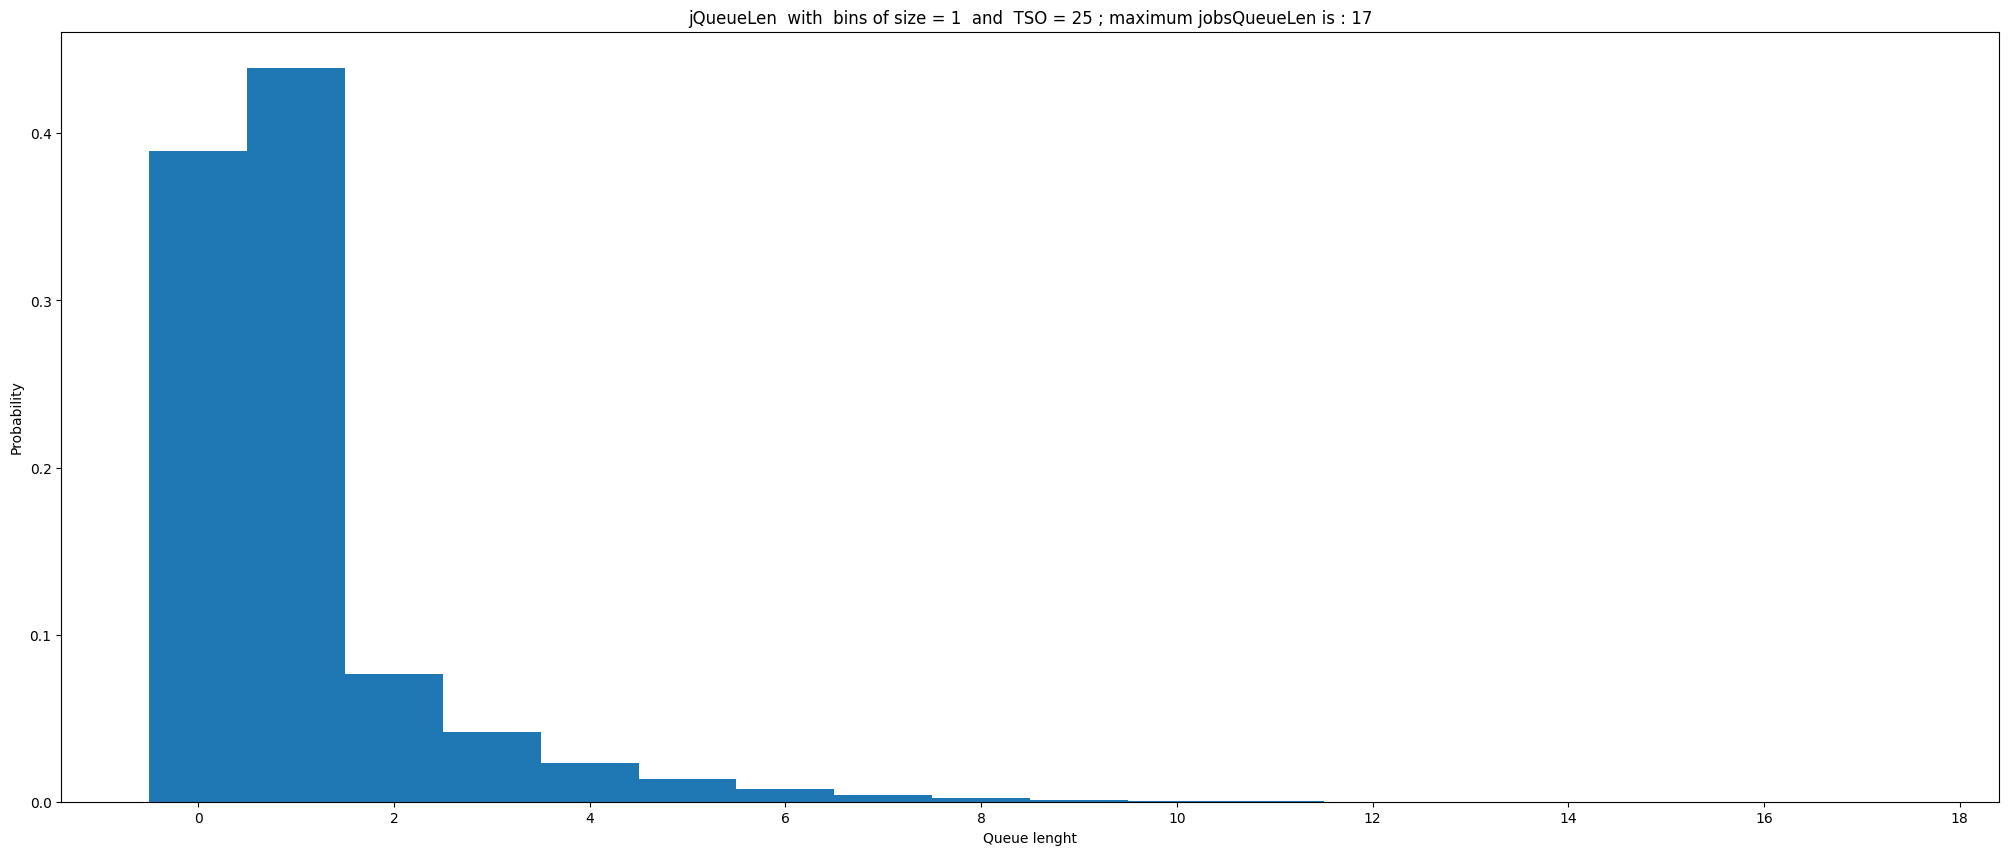

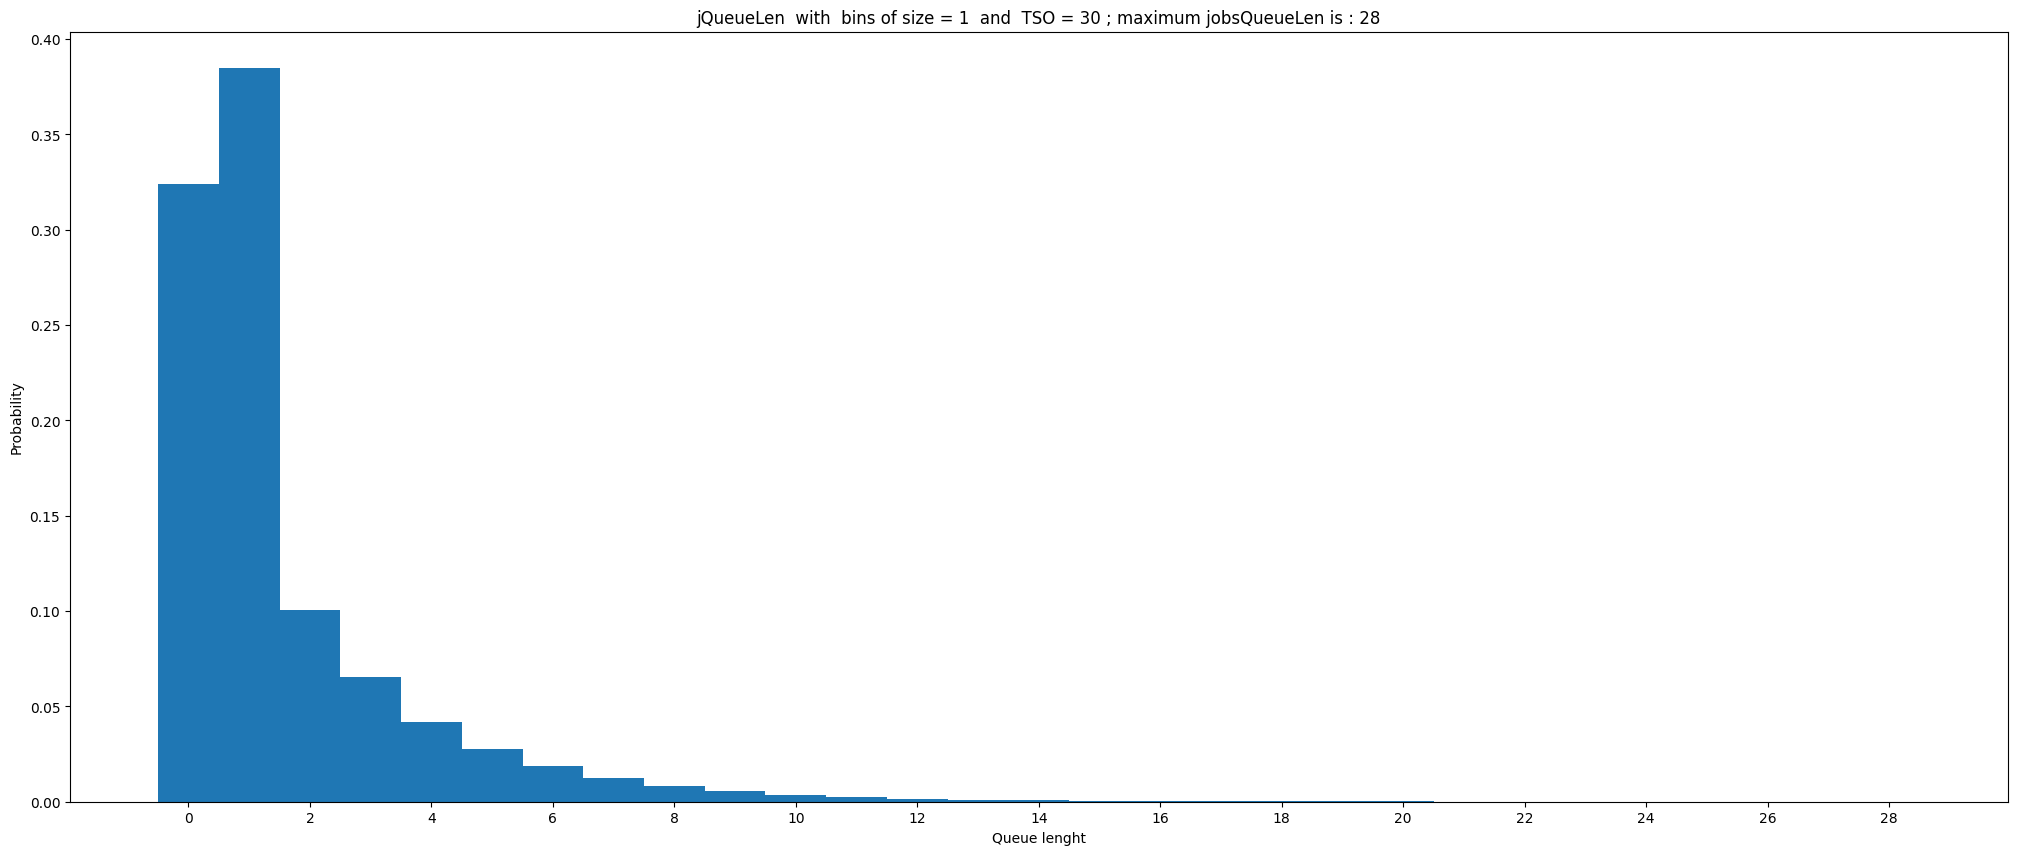

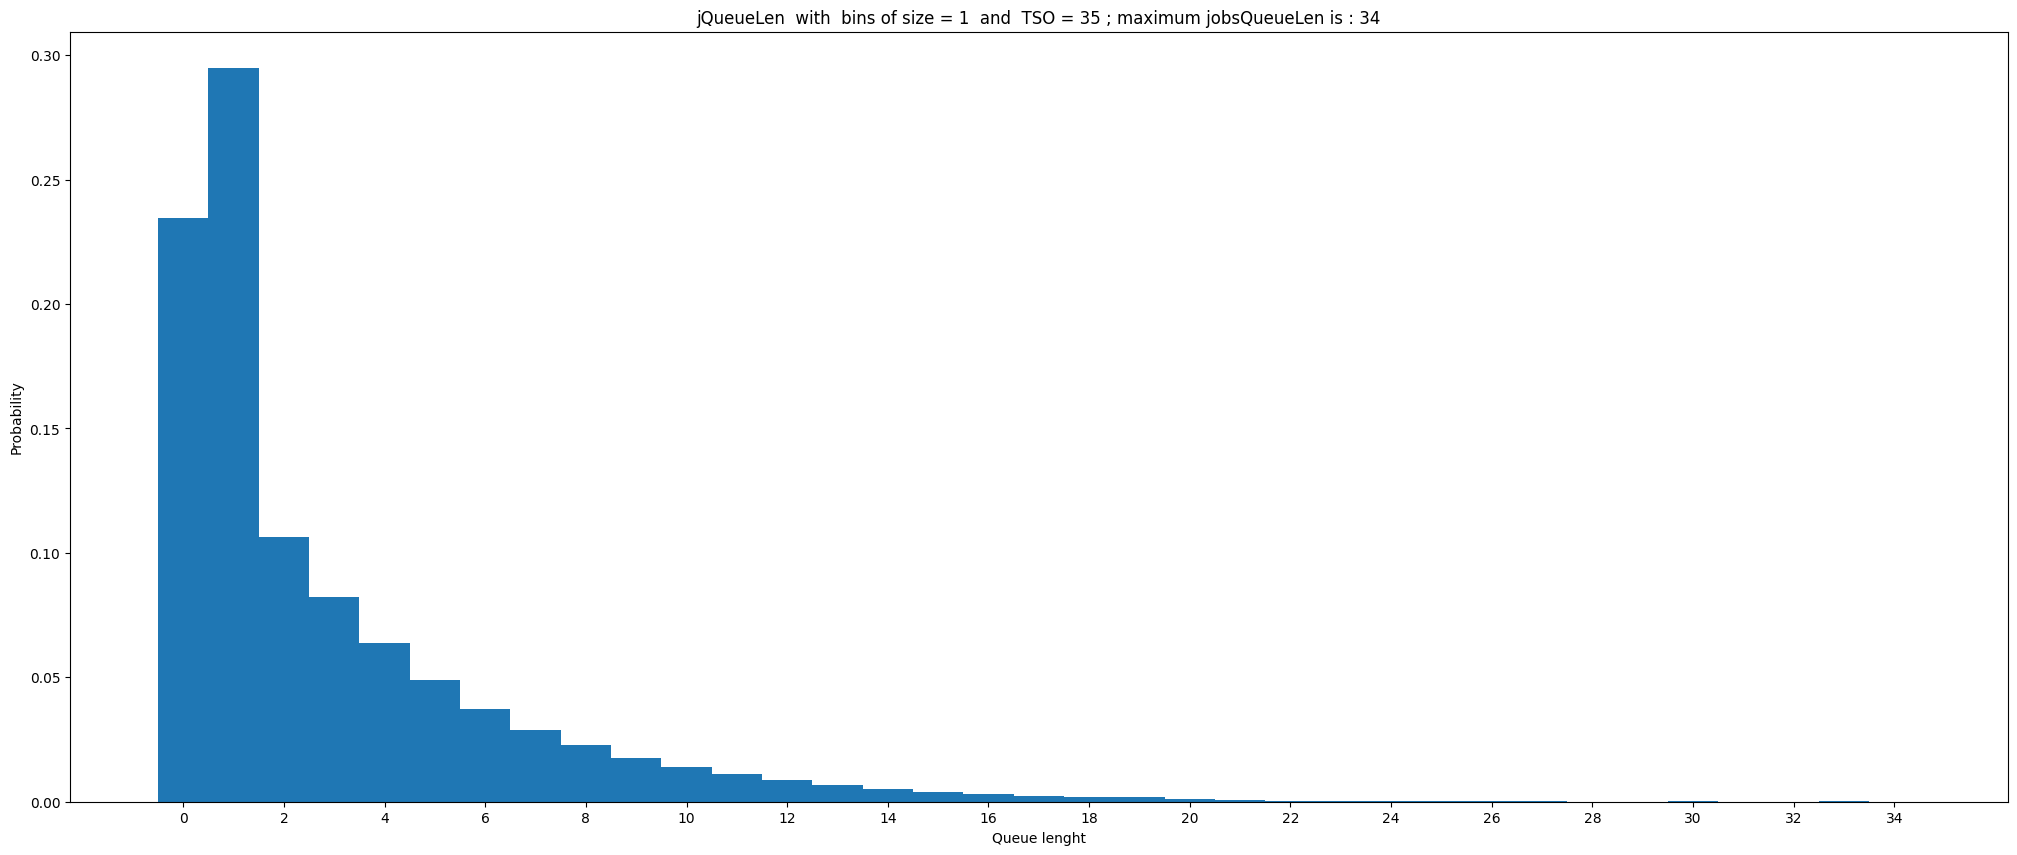

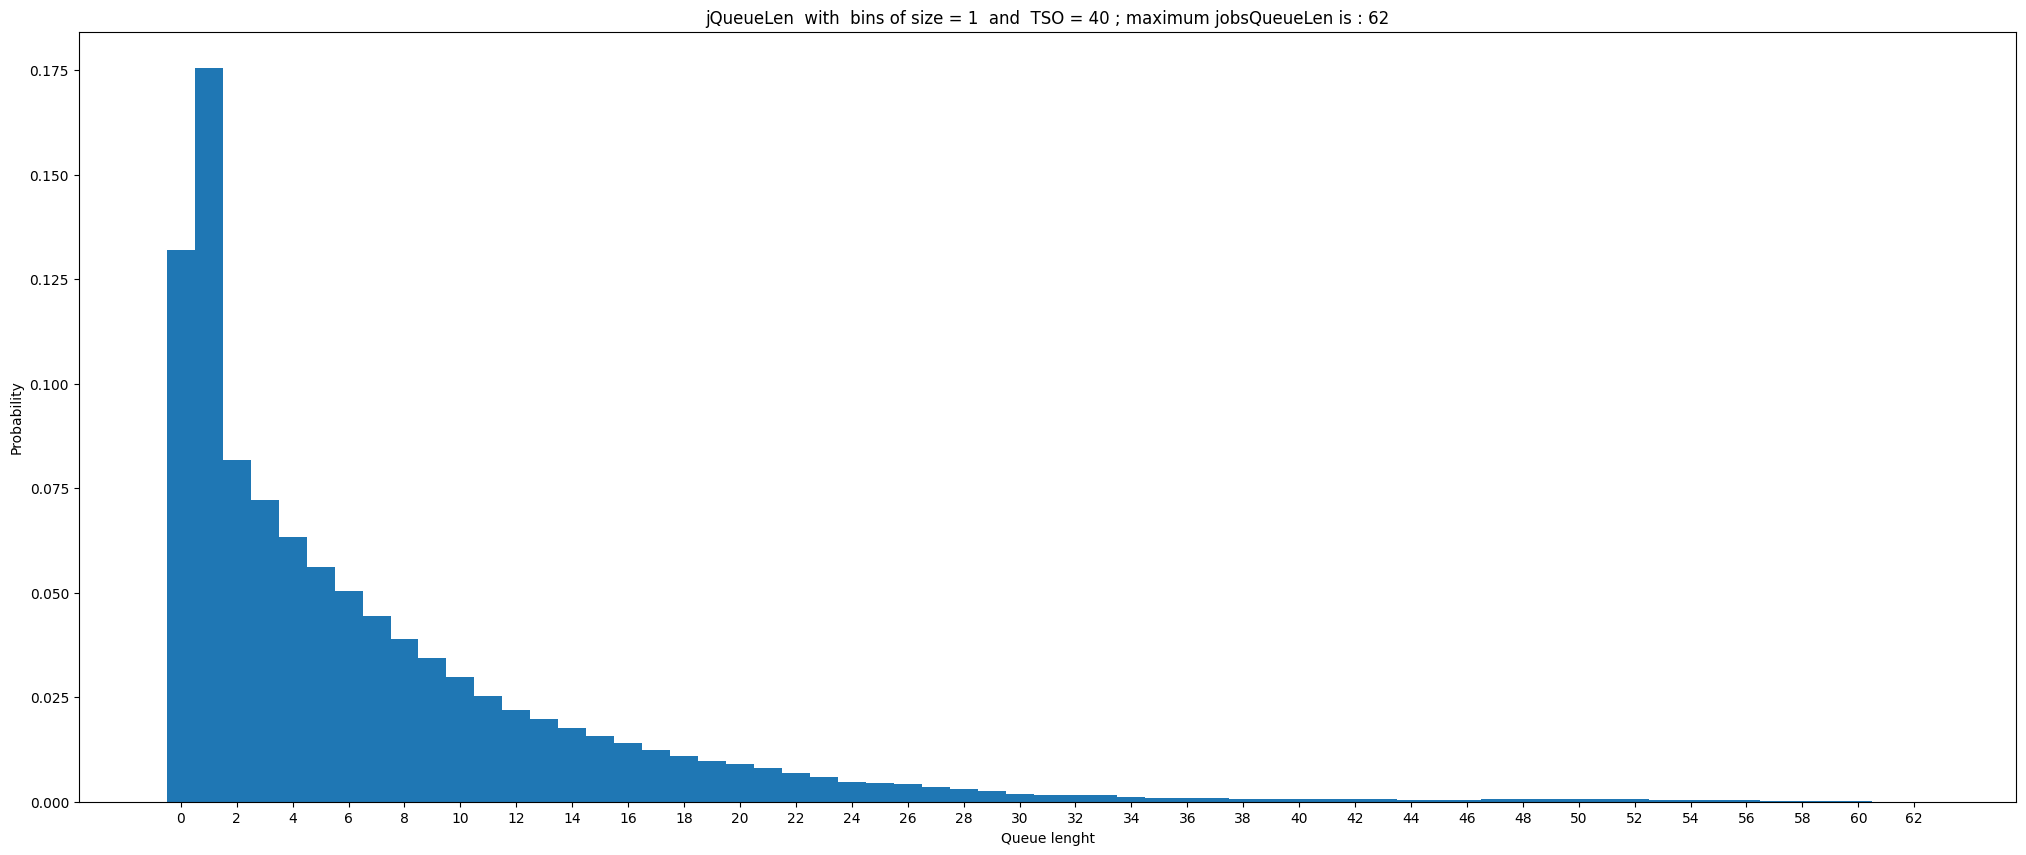

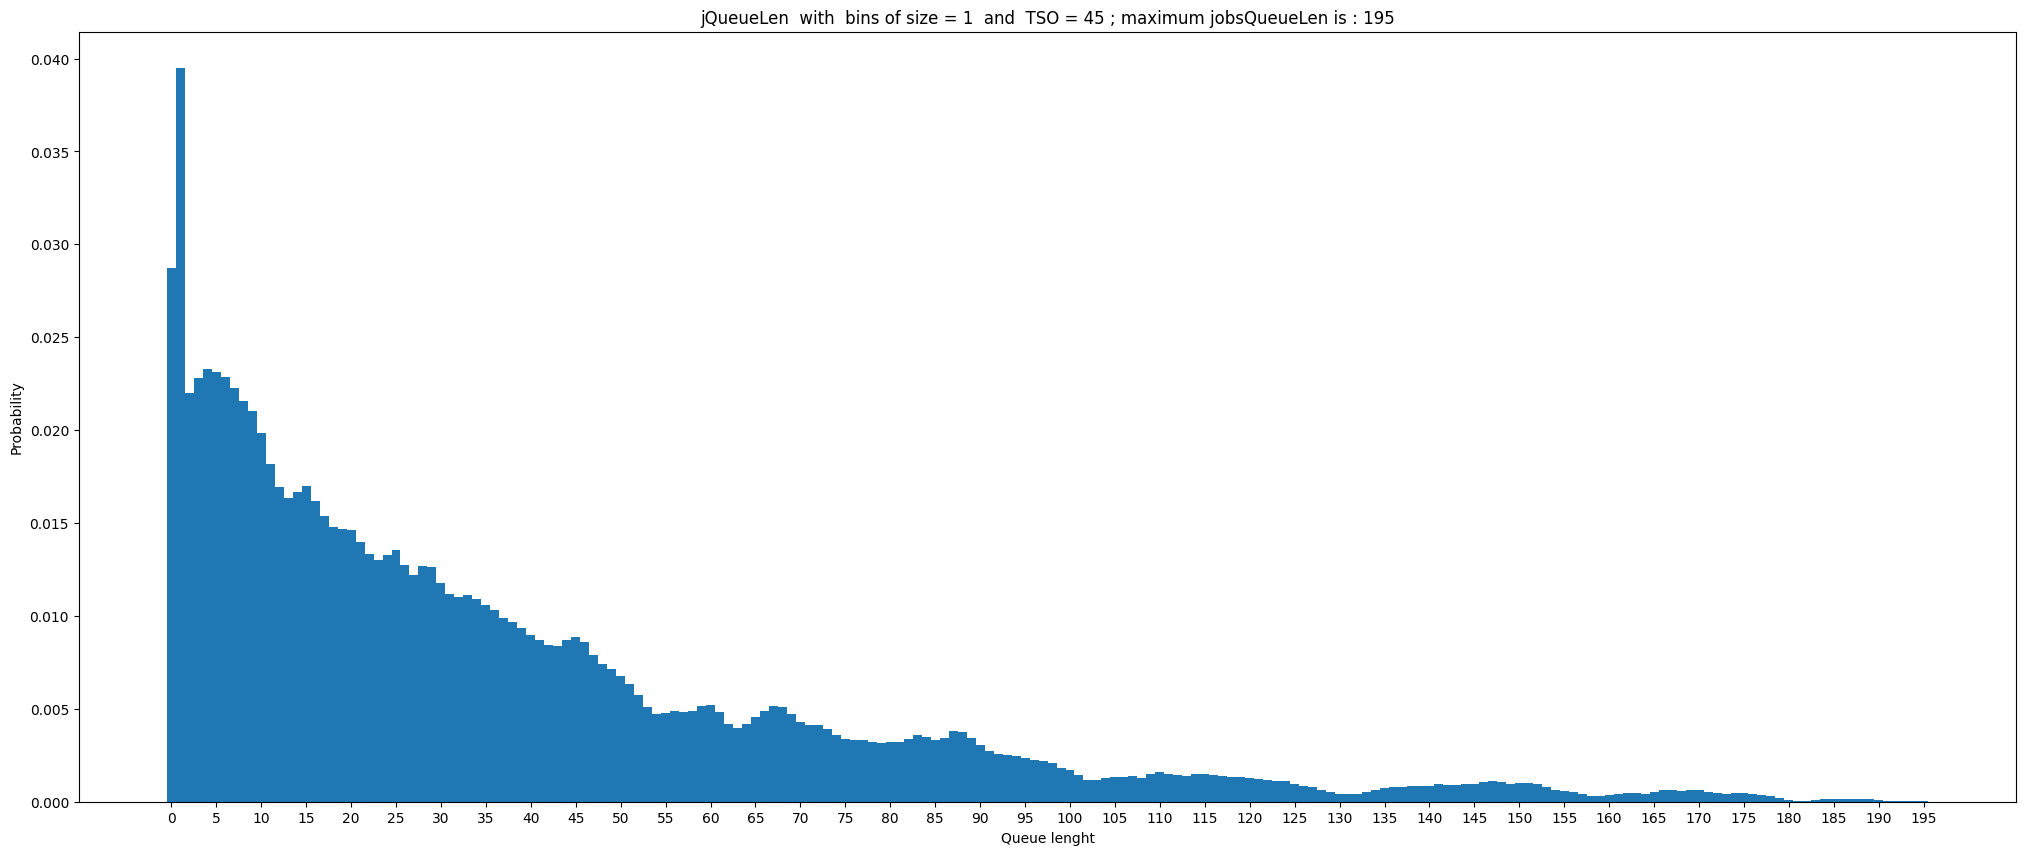

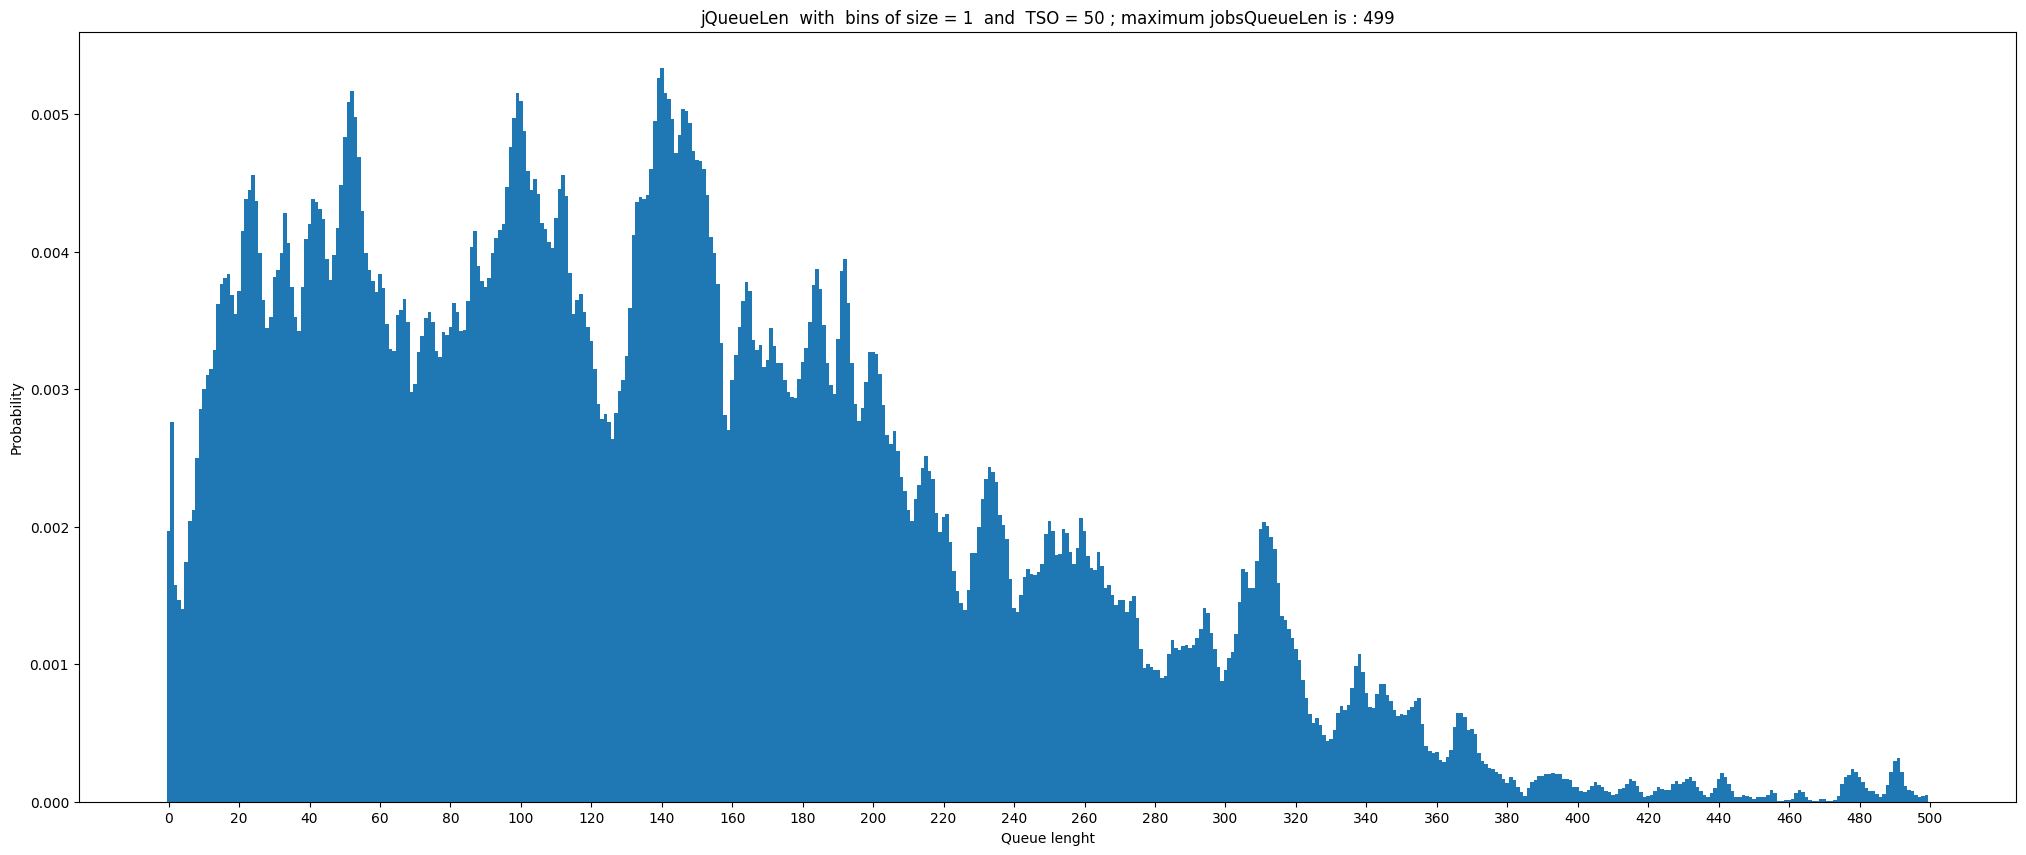

In [7]:
maximum_bins_number = 52

plot_dir = f'../images/plots' 
#   /plot{distribution}P{probability}_{target_tso[tso_this_iter]}'
for tso_this_iter in range(0, len(target_tso), 1) :
    plt.rcParams["figure.figsize"] = (25, 10)
    name = "jQueueLen"

    massimo_jQLen = max(nums_all_tsos[tso_this_iter])

    bin_size_chosen = massimo_jQLen

    counts, bins = np.histogram(nums_all_tsos[tso_this_iter], bins = bin_size_chosen)

    bins = bins - 0.5
    counts = counts / len(nums_all_tsos[tso_this_iter]) # normalize count

    plt.hist(bins[:-1], bins, weights=counts)
    plt.title(f"{name}  with  bins of size = {int(bins[1]-bins[0])}  and  TSO = {target_tso[tso_this_iter]} ; maximum jobsQueueLen is : {massimo_jQLen-1}")
    if bin_size_chosen < 100:
        plt.xticks(range(0, bin_size_chosen+1 , 2))
    elif bin_size_chosen < 200:
        plt.xticks(range(0, bin_size_chosen+1 , 5))
    elif bin_size_chosen < 400:
        plt.xticks(range(0, bin_size_chosen+1 , 10))
    elif bin_size_chosen < 800:
        plt.xticks(range(0, bin_size_chosen+1 , 20))
    plt.ylabel("Probability")
    plt.xlabel("Queue lenght")
    plt.savefig(f'{plot_dir}/plot{distribution}P{probability}_{target_tso[tso_this_iter]}.png')
    plt.show()

In [ ]:
#	import scipy.stats as sp_st
#	import matplotlib.pyplot as plt
#	
#	def qqplot(data, dist):
#		n = len(data)
#		xs = [dist((j+0.5)/n) for j in range(n)]
#		ys = sorted(data)
#		plt.plot(xs, ys, 'o')
#		
#		# show linear fit
#		a, b, *_ = sp_st.linregress(xs, ys)
#		x = np.linspace(*plt.xlim(), 100)
#		plt.plot(x, a*x + b, "--", color="lightgrey")
#	
#	name = "jQueueLen"
#	for tso_this_iter in range(0, len(target_tso), 1) :
#	    plt.title(f"{name}  TSO = {target_tso[tso_this_iter]}")
#	    plt.rcParams["figure.figsize"] = (10, 10)
#	    qqplot(nums_all_tsos[tso_this_iter], sp_st.expon.ppf)
#	    plt.ylabel("Sample quantiles")
#	    plt.xlabel("Exponential quantiles")
#	    plt.show()